# Import Libraries

In [1]:
from numpy import *
from matplotlib.pyplot import *

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from natsort import natsorted,ns
from os import listdir

import scipy.signal
from scipy.interpolate import interp1d
import scipy.optimize as opt
import scipy.misc
from scipy import ndimage

# Import Files

In [2]:
CurrentDirectory=%pwd 
homepath = CurrentDirectory+"\\AFMR\\AngDep\\Data\\"

fnames=natsorted(listdir(homepath))
# print(len(fnames)) # we have 37 .txt files in homepath

transpose=array([loadtxt(open(homepath+q).readlines()[2:-7], unpack=1,skiprows=0) for q in fnames])
# [2:-7] is equivalent to [2:43]. It reads from line 2 to line 42 on each file
# unpack = 0 : row in .txt file is row in transpose 
# unpack = 1 : row in .txt file is column in transpose
# print(transpose.shape) # = (37,7,41). transpose has 3 dimensions: (number of files, rows, columns)
# np.savetxt('transpose.txt',transpose[0,::,::],fmt='%1.4e',delimiter='\t') # export data from first file. See Fig. 3 @nepy.pe

tdata=transpose[::,::,::-1] 
# :: reads all files, :: reads all rows, ::-1 reverses the order of the columns.
# np.savetxt('tdata.txt',tdata[0,::,::],fmt='%1.4e',delimiter='\t') # export data from first file. See Fig. 4 @nepy.pe


# 1D Plot

(-0.5660231970542702, 4.819921427620963)

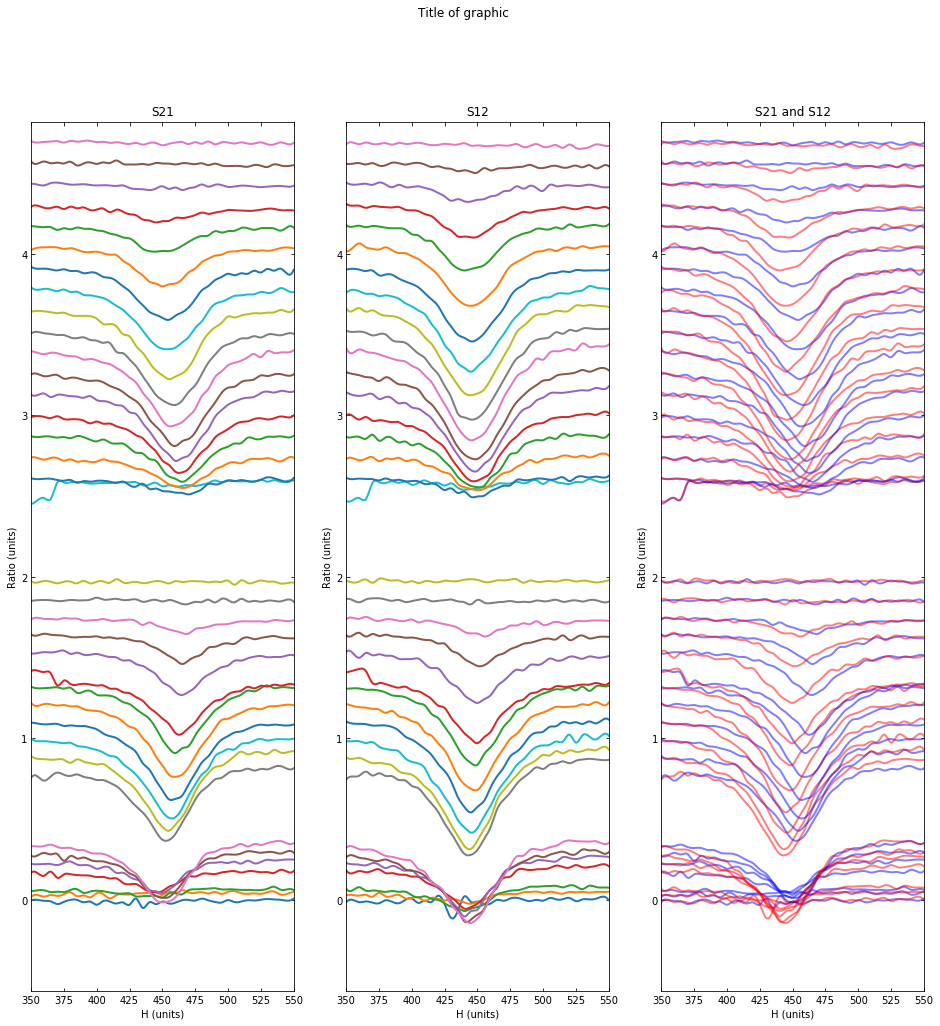

In [3]:
################################
################################
# First we set the graphs

# Figure control
figure(figsize=(16,16))

# subplot(row, column, position)
ax=plt.subplot(1,3,1)  # 'ax' is in the first position/column
ax1=plt.subplot(1,3,2) # 'ax1' is in the second position 
ax2=plt.subplot(1,3,3) # 'ax2' is in the third position

# Title and subtitles
plt.suptitle('Title of graphic')
ax.set_title('S21')
ax1.set_title('S12')
ax2.set_title('S21 and S12')

# Labels
Xlabel,XaxisU='H',' (units)'
Ylabel,YaxisU='Ratio',' (units)'

# xaxis label
ax.set_xlabel(Xlabel+XaxisU)
ax1.set_xlabel(Xlabel+XaxisU)
ax2.set_xlabel(Xlabel+XaxisU)

# yaxis label
ax.set_ylabel((Ylabel + YaxisU))
ax1.set_ylabel((Ylabel + YaxisU))
ax2.set_ylabel((Ylabel + YaxisU))

# Ticks
ax.tick_params(direction='in') # ticks are shown 'in'side the graph
ax.xaxis.set_ticks_position('both') # ticks of xaxis are shown in 'both', top and bottom
ax.yaxis.set_ticks_position('both') # ticks of yaxis are shown in 'both', top and bottom

ax1.tick_params(direction='in')
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both') 

ax2.tick_params(direction='in') 
ax2.xaxis.set_ticks_position('both') 
ax2.yaxis.set_ticks_position('both') 


################################
################################
# Second, we plot our data

# An AC voltage signal is measured on a piezoelectric material subjected to an external magnetic field H
# Fre is the frequency, deg is the phase, and Lin is the amplitude of the AC signal
# We have 2 configurations denoted S12 and S21
# The H field is applied with different angles. In total 37 angles ranging from 0 to 180 degrees (37 .txt files).
# The H field is applied with different magnitudes. In total 41 values ranging from 350 to 550 (41 columns in tdata)

# We plot relative Lin vs H for all angles

# xaxis details
xaxis=tdata[0][0][:] # tdata[file][row][column]. We set H (Oe) = xaxis, len(xaxis) = 41  
xmin,xmax=min(xaxis),max(xaxis) # xmin = 350 and xmax = 550
xnew=np.linspace(xmin, xmax, 500) # H(Oe) data is divided in 500 steps, len(xnew) = 500

# yaxis details
yangle=np.linspace(0,180,len(fnames)) # 1D array: [0,5,10,...175,180]. len(yangle) = 37 (corresponding to 37 .txt files)
yaxis1=np.zeros((len(yangle),len(xaxis))) # 2D array of 37 rows (angles) and 41 columns (H magnitudes)
yaxis2=np.zeros((len(yangle),len(xaxis))) # 2D array of 37 rows (angles) and 41 columns (H magnitudes)


for i in range(len(yangle)): # i = 0,1,2,...,36 
    
    for j in range(len(xaxis)): # j = 0,1,2,...,40
        
        # ratio = [Lin - Lin(H=355)] / Lin(H=355) 
        yaxis1[i][j]=(tdata[i][3][j]-tdata[i][3][1])/tdata[i][3][1] # For S21 configuration 
        yaxis2[i][j]=(tdata[i][6][j]-tdata[i][6][1])/tdata[i][6][1] # For S12 configuration
        
    # ymax and ymin for each i (angle) 
    ymax=max(max(yaxis1.ravel()),max(yaxis2.ravel()))
    ymin=min(min(yaxis1.ravel()),min(yaxis2.ravel()))
    
    
    if i>-1 and i<len(yangle): # i = 0,1,2...,36
      
        #create new data points from from original 41 points
        f1 = interp1d(xaxis, yaxis1[i,::], kind='cubic') # interpolation for S21    
        f2 = interp1d(xaxis, yaxis2[i,::], kind='cubic') # interpolation for S12  

        
        # +i*ymax is used to visualize all angular plots at different levels along the y-axis 
        ax.plot( xnew , f1(xnew)+i*ymax, ls="-", lw=2, alpha=1) # Plot configuration S12 in subplot 1
        ax1.plot(xnew , f2(xnew)+i*ymax, ls="-", lw=2, alpha=1) # Plot configuration S21 in subplot 2
        ax2.plot(xnew , f1(xnew)+i*ymax, ls="-", lw=2, alpha=0.5,c='b') # Plot configuration S12 in subplot 3
        ax2.plot(xnew , f2(xnew)+i*ymax, ls="-", lw=2, alpha=0.5,c='r') # Plot configuration S21 in subplot 3
       
        
# xaxis range
ax.set_xlim([xmin,xmax])
ax1.set_xlim([xmin,xmax])
ax2.set_xlim([xmin,xmax])

#yaxis range
ax.set_ylim([ymin,len(yangle)*ymax]) 
ax1.set_ylim([ymin,len(yangle)*ymax])
ax2.set_ylim([ymin,len(yangle)*ymax])




# 2D Plot

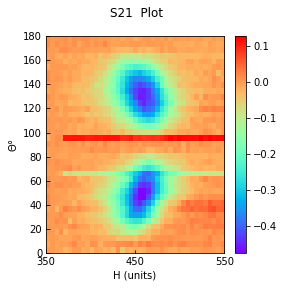

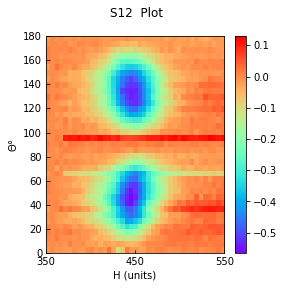

In [4]:
def Plot2DV4(xLow,xUp,yLow,yUp,PlotName):

    fig = plt.figure( figsize = (4, 4) )
    
    # yaxis has 37 rows and 41 columns (37 angles and 41 H magnitudes)
    # yaxis[0][0] corresponds to [Lin - Lin(H=355)] / Lin(H=355)  for angle = 0 and H magnitude = 350
    # yaxis[0][:] corresponds to [Lin - Lin(H=355)] / Lin(H=355) for angle = 0 and all H magnitudes. 
    # yaxis[37][0] correspondes to [Lin - Lin(H=355)] / Lin(H=355)  for angle = 180 and H magnitude = 350
    plt.imshow(yaxis,aspect='auto',cmap='rainbow',extent=(xaxis[0],xaxis[-1],yangle[0],yangle[-1]),\
              origin='lower',alpha=1) #2D plot. xaxis[-1] = xaxis[40]. yaxis[-1] = yaxis[36]
    
    plt.colorbar()

    plt.suptitle(PlotName + '  Plot         ')
    
    plt.xlabel(Xlabel+XaxisU)
    plt.ylabel('$ \Theta $'+'$\degree$')

    plt.tick_params(axis='both',direction="in")
    plt.yticks(np.arange(yLow, yUp+10, int((yUp-yLow)/9))) #ticks along the y axis in steps of 20
    plt.xticks(np.arange(xLow, xUp+10, int((xUp-xLow)/2))) #ticks along the x axis in steps of 100

    plt.xlim([xLow,xUp])
    plt.ylim([yLow,yUp])
    

    return plt.show()


yaxis=yaxis1
Plot2DV4(xmin,xmax,0,180,'S21') # call function for S21


yaxis=yaxis2
Plot2DV4(xmin,xmax,0,180,'S12') # call function for S12


